Question 1.1

In [1]:
from __future__ import division
import numpy as np

def Ham(N,V,m):
    H = np.zeros((N,N))
    q = 2. * np.pi / m
    for i in range(N):
        H[i,(i+1)%N] = - 1.
        H[i,(i-1)%N] = - 1.
        H[i,i] = V * np.cos( q * ( i + 1 ) )
    return H

Question 1.2

We suggest to directly plot the eigenvalues as a function of their index, but also the distribution of eigenvalues to appreciate more easily the appearance of holes in the spectrum when $V\neq 0$.

Text(0, 0.5, '$\\mathcal{P}(\\lambda_k$)')

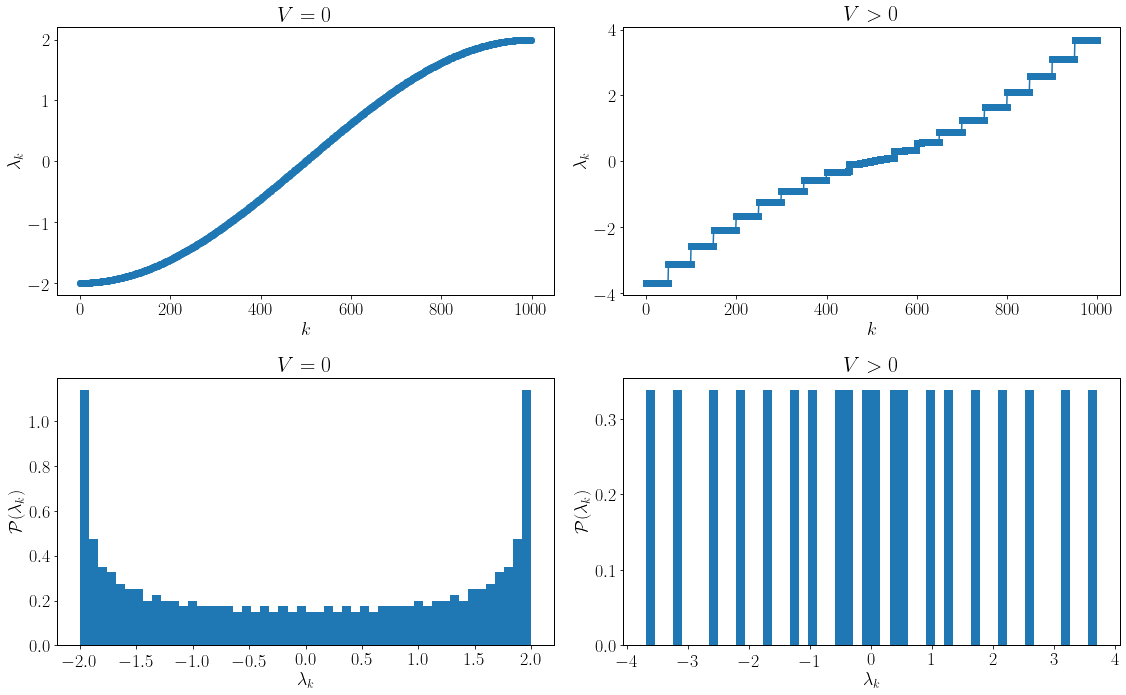

In [2]:
import numpy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt

#Direct input
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{lmodern} \usepackage{bm}')
#Options
params = {'text.usetex' : True,
          'font.size' : 18,
          'font.family' : 'lmodern',
          }
plt.rcParams.update(params)
mpl.rcParams['axes.linewidth'] = 1.

N = 1000
m = 20
V = 2.
eigenvals_0, eigenvecs_0 = la.eigh(Ham(N,0,m))
eigenvals, eigenvecs = la.eigh(Ham(N,V,m))

fig, ax = plt.subplots(2, 2, figsize = (16, 10), tight_layout = True)
ax[0,0].plot(eigenvals_0, '-o')
ax[0,0].set_title(r'$V=0$')
ax[0,0].set_xlabel(r'$k$')
ax[0,0].set_ylabel(r'$\lambda_k$')
ax[0,1].plot(eigenvals, '-s')
ax[0,1].set_title(r'$V>0$')
ax[0,1].set_xlabel(r'$k$')
ax[0,1].set_ylabel(r'$\lambda_k$')
ax[1,0].hist(eigenvals_0, bins = N // 20, density = True) # Sturges rule : number of bins should be log2(N) + 1
ax[1,1].hist(eigenvals, bins = N // 20, density = True)
ax[1,0].set_title(r'$V=0$')
ax[1,1].set_title(r'$V>0$')
ax[1,0].set_xlabel(r'$\lambda_k$')
ax[1,1].set_xlabel(r'$\lambda_k$')
ax[1,0].set_ylabel(r'$\mathcal{P}(\lambda_k$)')
ax[1,1].set_ylabel(r'$\mathcal{P}(\lambda_k$)')
#fig.show()

Question 1.3

We suggest to plot the difference between two consecutive eigenvalues, gaps are magnified by large values in this plot. 

We then smooth this signal via a convolution with a Blackman window (its size can change the number of maxima counted by the algorithm), and we count the number of peaks via the function "find_peaks" of the Python library scipy.signal. Equivalently, this can be done by hand for few values of $m$.

Text(0.5, 1.0, 'Number of gaps = 18')

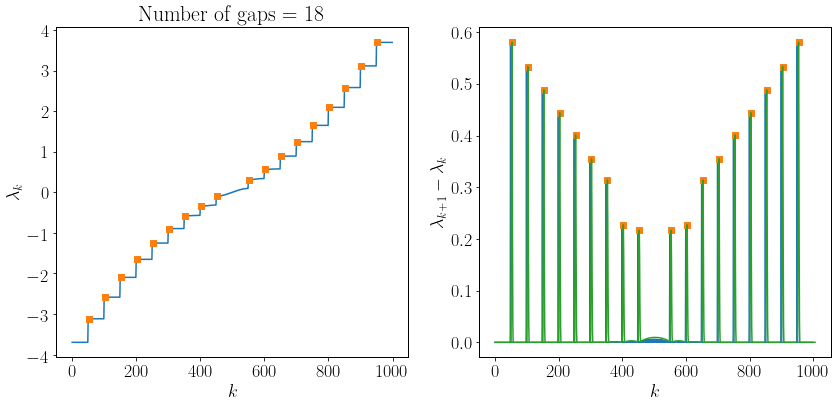

In [3]:
import scipy.signal as sig

def find_gaps(N,m,V,len_window=8):
    eigenvals, eigenvecs = la.eigh(Ham(N,V,m))
    cumul_diff = np.diff(eigenvals)
    windowB = sig.get_window('blackman', len_window)
    cumul_diff_smooth = np.convolve(cumul_diff, windowB)
    extr, prop = sig.find_peaks(cumul_diff_smooth, width = [2, len_window // 2]) 
    return cumul_diff, cumul_diff_smooth, extr
# width = minimum width of the peak, 
# prop = dict with properties of the peak,
# extr = location of the extrema

N = 1000
m = 20
V = 2.

cumul_diff, cumul_diff_smooth, extr = find_gaps(N,m,V)
fig, ax = plt.subplots(1, 2, figsize = (12, 6), tight_layout = True)
ax[1].plot(cumul_diff, label = 'Raw')
ax[1].plot(extr, cumul_diff_smooth[extr], 's', label = 'Max detection')
ax[1].plot(cumul_diff_smooth, label = 'Smooth')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylabel(r'$\lambda_{k+1}-\lambda_k$')
ax[0].plot(eigenvals, label = 'Raw')
extr_red = extr[extr < len(eigenvals)]
ax[0].plot(extr_red, eigenvals[extr_red], 's', label = 'Max detection')
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$\lambda_k$')
ax[0].set_title('Number of gaps = {0}'.format(len(extr)))
#fig.show()

For different values of $m$, we count the number of peaks in the plot and we plot this number as a function of $m$. We observe that the number of gaps scales linearly with the integer $m$.

Text(0, 0.5, 'Number of gaps')

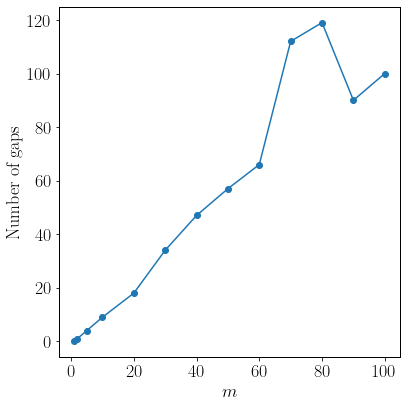

In [4]:
gaps_array = []
m_array = np.array( [ 1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 ] )
for m in m_array:
    cumul_diff, cumul_diff_smooth, extr = find_gaps(N,m,V)
    gaps_array += [len(extr)]
gaps_array = np.array(gaps_array)
fig, ax = plt.subplots(figsize = (6, 6), tight_layout = True)
ax.plot(m_array, gaps_array, '-o')
ax.set_xlabel(r'$m$')
ax.set_ylabel('Number of gaps')
#fig.show()

Question 1.4

We determine the maximum value of the cumulative difference between the consecutive eigenvalues, and we monitor its $V$-dependence. We do not consider the mean value of the cumulative difference, in case we overcount gaps.

Text(0.5, 1.0, 'Number of gaps = 22')

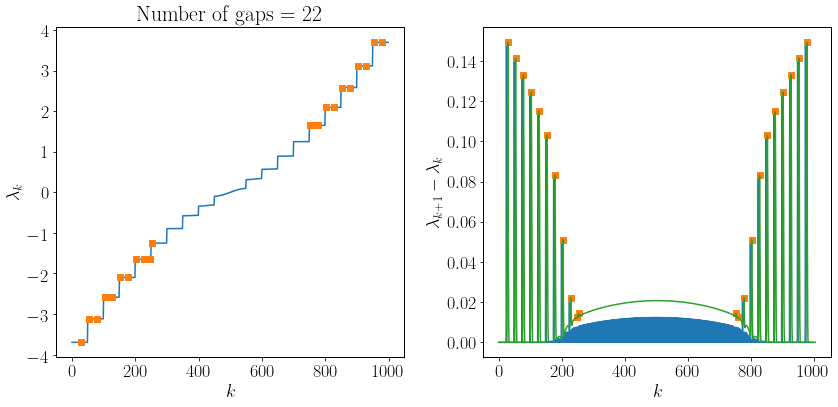

In [5]:
N = 1000
m = 40
V = 0.5

cumul_diff, cumul_diff_smooth, extr = find_gaps(N,m,V)
fig, ax = plt.subplots(1, 2, figsize = (12, 6), tight_layout = True)
ax[1].plot(cumul_diff, label = 'Raw')
ax[1].plot(extr, cumul_diff_smooth[extr], 's', label = 'Max detection')
ax[1].plot(cumul_diff_smooth, label = 'Smooth')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylabel(r'$\lambda_{k+1}-\lambda_k$')
ax[0].plot(eigenvals, label = 'Raw')
extr_red = extr[extr < len(eigenvals)]
ax[0].plot(extr_red, eigenvals[extr_red], 's', label = 'Max detection')
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$\lambda_k$')
ax[0].set_title('Number of gaps = {0}'.format(len(extr)))
#fig.show()

We observe that the gap amplitude grows linearly with $V$, at least at large enough values of $V$.

/tmp/ipykernel_278344/1598244627.py:8: PeakPropertyWarning: some peaks have a width of 0
  extr, prop = sig.find_peaks(cumul_diff_smooth, width = [2, len_window // 2])


Text(0, 0.5, 'Gap amplitude')

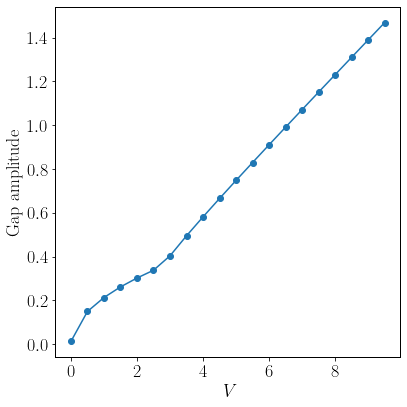

In [6]:
V_arr = np.arange(0., 10., 0.5)
gap_arr = np.zeros(len(V_arr))
for i in range(len(V_arr)):
    cumul_diff, cumul_diff_smooth, extr = find_gaps(N,m,V_arr[i])
    gap_arr[i] = np.amax(cumul_diff)

fig, ax = plt.subplots(figsize = (6, 6), tight_layout = True)
ax.plot(V_arr, gap_arr, '-o')
ax.set_xlabel(r'$V$')
ax.set_ylabel('Gap amplitude')
#fig.show()

Question 1.5

When plotting the ground state and the most excited state, one notes that the wavefunctions are periodic with the same period as the potentiel, namely, $2\pi/q$. In addition, the wavefunction of the most excited state is more localized at the maxima of the potential, while the amplitude of probability vanishes at its minima. As a consequence, the eigenmode of the most excited state varies more strongly, corresponding to a higher kinetic energy. Instead, the eigenfunction of the ground state has maximum amplitude in the minima of the potential but vanishes at its maxima. Moreover, it is smooth, so that its kinetic energy is also smaller.

One recovers the Heisenberg uncertainty principle: the particule is more confined implies that its energy is higher.

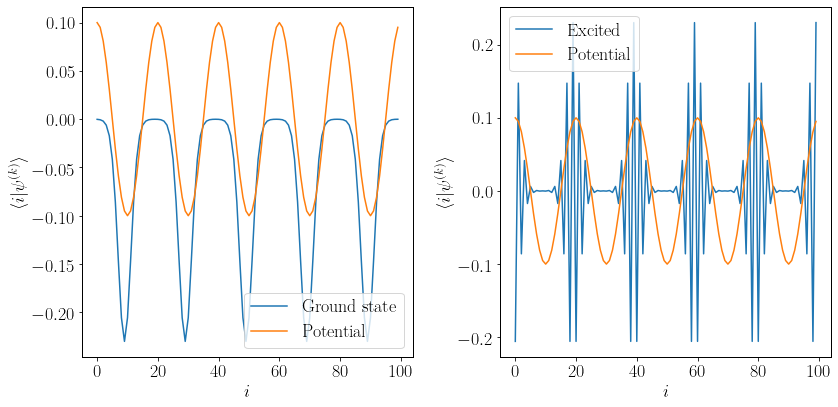

In [7]:
import scipy.interpolate as interp

N = 100
V = 1
m = 20
eigenvals, eigenvecs = la.eigh(Ham(N,V,m))

fig, ax = plt.subplots(1, 2, figsize = (12, 6), tight_layout = True)
ax[0].plot(eigenvecs[:,0], label = 'Ground state')
ax[1].plot(eigenvecs[:,-1], label = 'Excited')
ax[0].plot(np.cos( 2. * np.pi / m * np.arange(N)) / 10, label = 'Potential')
ax[1].plot(np.cos( 2. * np.pi / m * np.arange(N)) / 10, label = 'Potential')
ax[0].set_xlabel(r'$i$')
ax[0].set_ylabel(r'$\langle i\vert\psi^{(k)}\rangle$')
ax[1].set_xlabel(r'$i$')
ax[1].set_ylabel(r'$\langle i\vert\psi^{(k)}\rangle$')
ax[0].legend()
ax[1].legend()
#fig.show()

When comparing the wavefunctions surrounding a gap, we observe that most of the zeros of the upper wavefunction coincide with the extrema of the lower wavefunction, as if one was the derivative of the other.

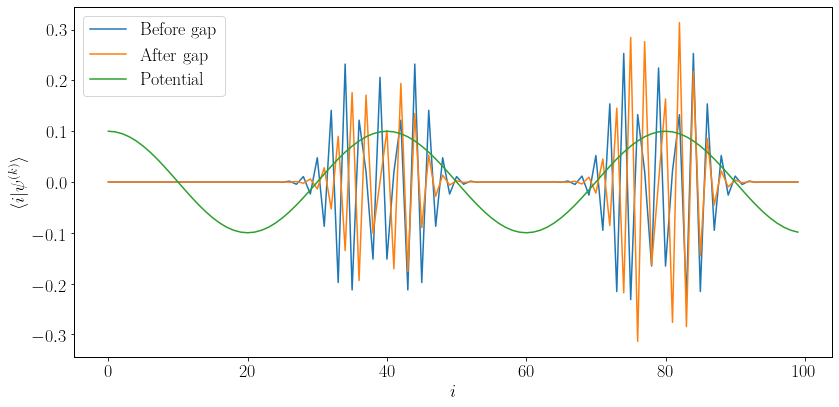

In [8]:
N = 100
V = 1
m = 40
eigenvals, eigenvecs = la.eigh(Ham(N,V,m))
cumul_diff, cumul_diff_smooth, extr = find_gaps(N,m,V)
j = np.argmax(cumul_diff)
fig, ax = plt.subplots(figsize = (12, 6), tight_layout = True)
ax.plot(eigenvecs[:,j], label = 'Before gap')
ax.plot(eigenvecs[:,j+1], label = 'After gap')
ax.plot(np.cos( 2. * np.pi / m * np.arange(N)) / 10, label = 'Potential')
ax.set_xlabel(r'$i$')
ax.set_ylabel(r'$\langle i\vert\psi^{(k)}\rangle$')
ax.legend()
#fig.show()

Question 2.1

We observe a strong localisation of the wavefunction, with a single peak for $V>2$. The location of the peak changes with $N$. In small-enough systems, the wavefunction can display two peaks for $V=2$, but the one of smaller amplitude disappears when $V$ is further increased slightly above $V=2$. 

Text(0, 0.5, '$\\vert\\psi_i^{(0)}\\vert^2$')

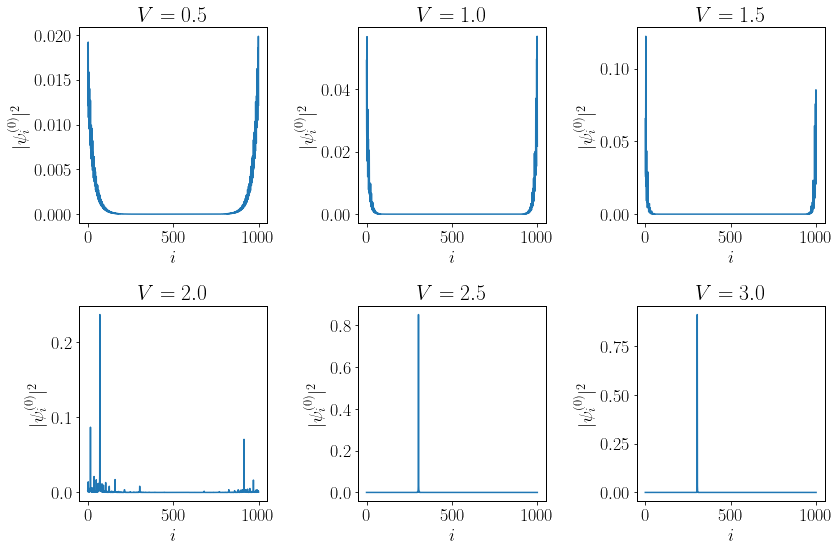

In [9]:
def Ham(N,V,al):
    H = np.zeros((N,N))
    q = 2. * np.pi * al
    for i in range(N):
        H[i,(i+1)%N] = - 1.
        H[i,(i-1)%N] = - 1.
        H[i,i] = V * np.cos( q * ( i + 1 ) )
    return H

golden = 2. / ( 1. + np.sqrt(5.) )
N = 1000

Varr = [ 0.5, 1., 1.5, 2., 2.5, 3. ]
fig, ax = plt.subplots(2, 3, figsize = (12, 8), tight_layout = True)
for i in range(len(Varr)):
    eigenvals, eigenvecs = la.eigh(Ham(N,Varr[i],golden))
    ax[i//3,i%3].plot(np.absolute(eigenvecs[:,0]) ** 2)
    ax[i//3,i%3].set_title(r'$V={0}$'.format(Varr[i]))
ax[0,0].set_xlabel(r'$i$')
ax[0,1].set_xlabel(r'$i$')
ax[0,2].set_xlabel(r'$i$')
ax[1,0].set_xlabel(r'$i$')
ax[1,1].set_xlabel(r'$i$')
ax[1,2].set_xlabel(r'$i$')
ax[0,0].set_ylabel(r'$\vert\psi_i^{(0)}\vert^2$')
ax[0,1].set_ylabel(r'$\vert\psi_i^{(0)}\vert^2$')
ax[0,2].set_ylabel(r'$\vert\psi_i^{(0)}\vert^2$')
ax[1,0].set_ylabel(r'$\vert\psi_i^{(0)}\vert^2$')
ax[1,1].set_ylabel(r'$\vert\psi_i^{(0)}\vert^2$')
ax[1,2].set_ylabel(r'$\vert\psi_i^{(0)}\vert^2$')
#fig.show()

Question 2.2

We observe that the participation ratio in the ground state decreases continuously with $V$ until it drops discontinuously to 0 for $V\simeq2$. Indeed, for a completely localized state $\psi_i^{(0)}$ is not zero for a single value of $i$, and $P^{(0)}=1/N$.

Be careful of the finite-size effects (already mentioned in the previous section). If $N$ is not large-enough, the Aubry-André transition can be smeared out or at a higher value of $V$.

$\textit{Extra question}$

We observe the same phenomenology as for the ground state, namely, the participation ratio drops to zero for $V\simeq 2$.

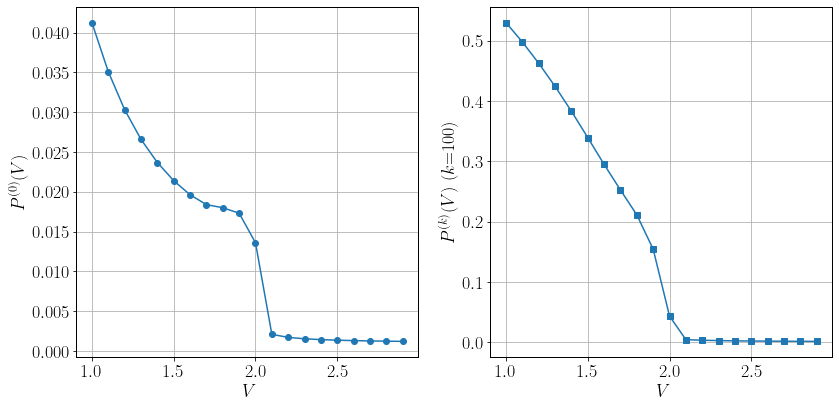

In [10]:
Varr = np.arange(1., 3., 0.1)
part_ratio_gs = np.zeros(len(Varr))
part_ratio_excited = np.zeros(len(Varr))
N = 1000
rk = 100 # excited state
for i in range(len(Varr)):
    eigenvals, eigenvecs = la.eigh(Ham(N,Varr[i],golden))
    part_ratio_gs[i]=1. / N / np.sum(np.absolute(eigenvecs[:,0]) ** 4)
    part_ratio_excited[i]=1. / N / np.sum(np.absolute(eigenvecs[:,rk]) ** 4)
fig, ax = plt.subplots(1, 2, figsize = (12, 6), tight_layout = True)
ax[0].plot(Varr, part_ratio_gs, '-o')
ax[1].plot(Varr, part_ratio_excited, '-s')
ax[0].set_xlabel(r'$V$')
ax[0].set_ylabel(r'$P^{(0)}(V)$')
ax[1].set_xlabel(r'$V$')
ax[1].set_ylabel(r'$P^{(k)}(V)$ ($k$=' + '{0})'.format(rk))
ax[0].grid()
ax[1].grid()
#fig.show()

Question 3.1

In [11]:
N = 1000
V = 2.
al = 4. * np.pi / ( 1. + np.sqrt(5.) ) 
H = Ham(N,V,al)

Question 3.2

In [12]:
import numpy.random as rand

u0 = rand.normal(0., 1., N) # all components are distributed according to a normal distribution
u0 /= la.norm(u0)

Question 3.3

This process is analogous to the Gram-Schmidt process, and $\mathbf{u_0}^T\mathbf{u_1}=0$.

In [13]:
utmp = np.matmul(H, u0)
u1 = utmp - np.dot(u0, utmp) * u0
u1 /= la.norm(u1)

Question 3.4

We want to diagonalize the matrix $H^{(1)}=\begin{pmatrix} A&B\\C&D\end{pmatrix}$ with $A=\mathbf{u}_0^TH\mathbf{u_0}$, $B=\mathbf{u}_0^TH\mathbf{u_1}$, $C=\mathbf{u}_1^TH\mathbf{u_0}$ and $D=\mathbf{u}_1^TH\mathbf{u_1}$. As $H$ is Hermitian (here real and symmetric), one has $B=C$.

The eigenvalues verify the equation $\lambda^2-(A+D)\lambda+AD-BC=0$, whose solutions are $\lambda_\pm=\displaystyle\frac{A+D\pm\sqrt{(A+D)^2-4(AD-BC)}}{2}$.

The corresponding eigenvectors $\mathbf{\psi}_\pm^{(1)}=a_\pm\mathbf{u_0}+b_\pm\mathbf{u_1}$ verify the system
$\left\{\begin{matrix}
Aa_\pm+Bb_\pm=\lambda_\pm a_\pm,\\
Ca_\pm+Db_\pm=\lambda_\pm b_\pm.
\end{matrix}\right.$

You can take $a_\pm=\displaystyle \frac{B}{\sqrt{(\lambda_\pm-A)^2+B^2}}$ and $\displaystyle b_\pm=\frac{(\lambda_\pm-A)}{\sqrt{(\lambda_\pm-A)^2+B^2}}$.

The lowest energy eigenstate corresponds to the "-" solution.

In [14]:
u1tmp = np.matmul(H, u1)
A = np.dot(u0, utmp)
B = np.dot(u0, u1tmp)
C = np.dot(u1, utmp)
D = np.dot(u1, u1tmp)

en1 = 0.5 * ( A + D - np.sqrt( ( A + D ) ** 2 - 4. * ( A * D - B * C ) ) )
psi0 = B * u0 + ( en1 - A ) * u1
psi0 /= np.sqrt( (en1 - A) ** 2 + B * B )

Question 3.5

In [15]:
psitmp = np.matmul(H, psi0)
psi1 = psitmp - np.dot(psi0, psitmp) * psi0
psi1 /= la.norm(psi1)

psi1tmp = np.matmul(H, psi1)
A = np.dot(psi0, psitmp)
B = np.dot(psi0, psi1tmp)
C = np.dot(psi1, psitmp)
D = np.dot(psi1, psi1tmp)

en2 = 0.5 * ( A + D - np.sqrt( ( A + D ) ** 2 - 4. * ( A * D - B * C ) ) )
psi0 = B * psi0 + ( en2 - A ) * psi1
psi0 /= np.sqrt( (en2 - A) ** 2 + B * B )

Question 3.6

One should observe that the estimated value of the groud state energy converges exponentially to the exact value. However, the distance between the estimated value and the exact value remains finite, with an error of about 0.2\%.

Text(0, 0.5, '$\\left\\vert E_0^{(n)}-E_0\\right\\vert$')

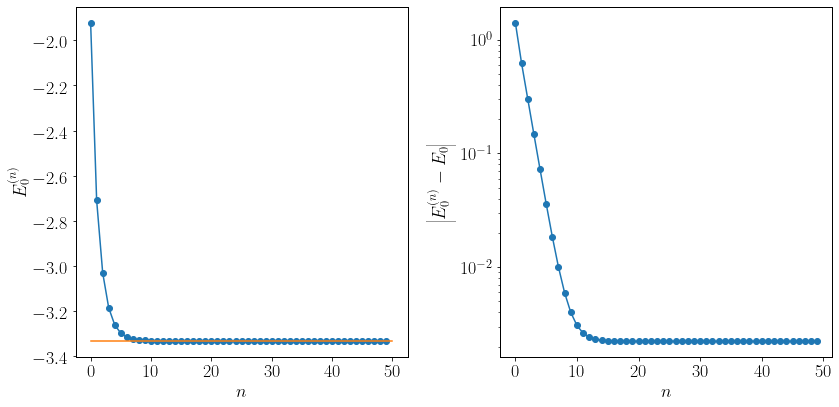

In [16]:
N = 1000
V = 2.
al = 4. * np.pi / ( 1. + np.sqrt(5.) ) 
H = Ham(N,V,al)
rand.seed() # change the sequence of random numbers
psi0 = rand.normal(0., 1., N)
psi0 /= la.norm(psi0)
En=[]

for i in range(50):
    psitmp = np.matmul(H, psi0)
    psi1 = psitmp - np.dot(psi0, psitmp) * psi0
    psi1 /= la.norm(psi1)

    psi1tmp = np.matmul(H, psi1)
    A = np.dot(psi0, psitmp)
    B = np.dot(psi0, psi1tmp)
    C = np.dot(psi1, psitmp)
    D = np.dot(psi1, psi1tmp)

    en = 0.5 * ( A + D - np.sqrt( ( A + D ) ** 2 - 4. * ( A * D - B * C ) ) )
    psi0 = B * psi0 + ( en - A ) * psi1
    psi0 /= np.sqrt( (en - A) ** 2 + B * B )
    En += [en]

eigenvals, eigenvecs = la.eigh(H)
fig, ax = plt.subplots(1, 2, figsize = (12, 6), tight_layout = True)
ax[0].plot(En, '-o')
ax[0].plot(np.array([0.,len(En)]), np.array([eigenvals[0],eigenvals[0]]), '-')
ax[1].semilogy(np.absolute(En - eigenvals[0]), '-o')
ax[0].set_xlabel(r'$n$')
ax[1].set_xlabel(r'$n$')
ax[0].set_ylabel(r'$E_0^{(n)}$')
ax[1].set_ylabel(r'$\left\vert E_0^{(n)}-E_0\right\vert$')
#fig.show()